In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('startup.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

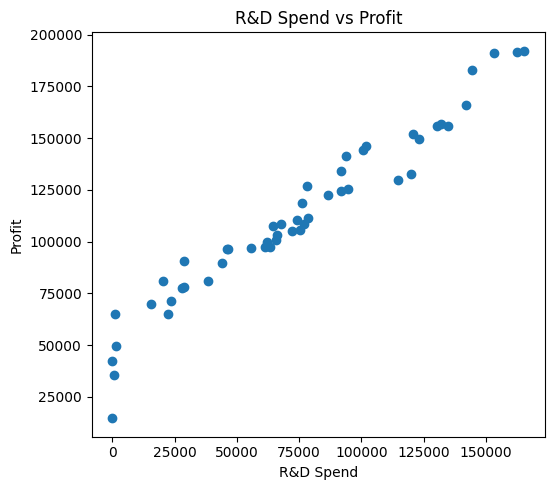

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

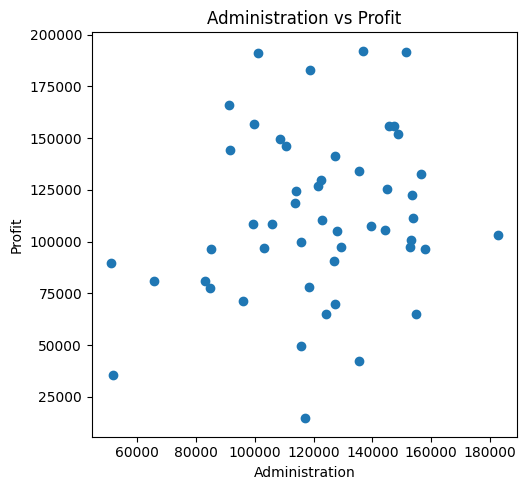

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(df['Administration'], df['Profit'])
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

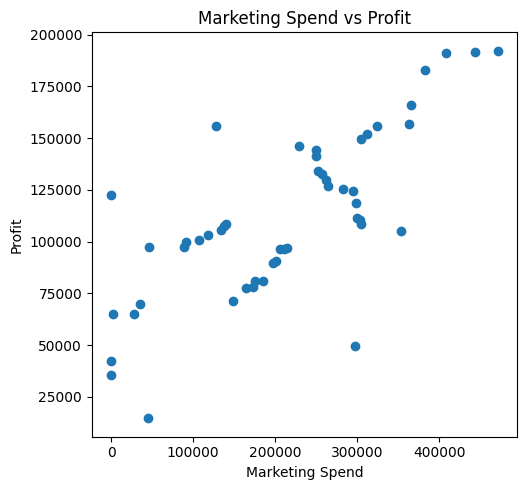

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

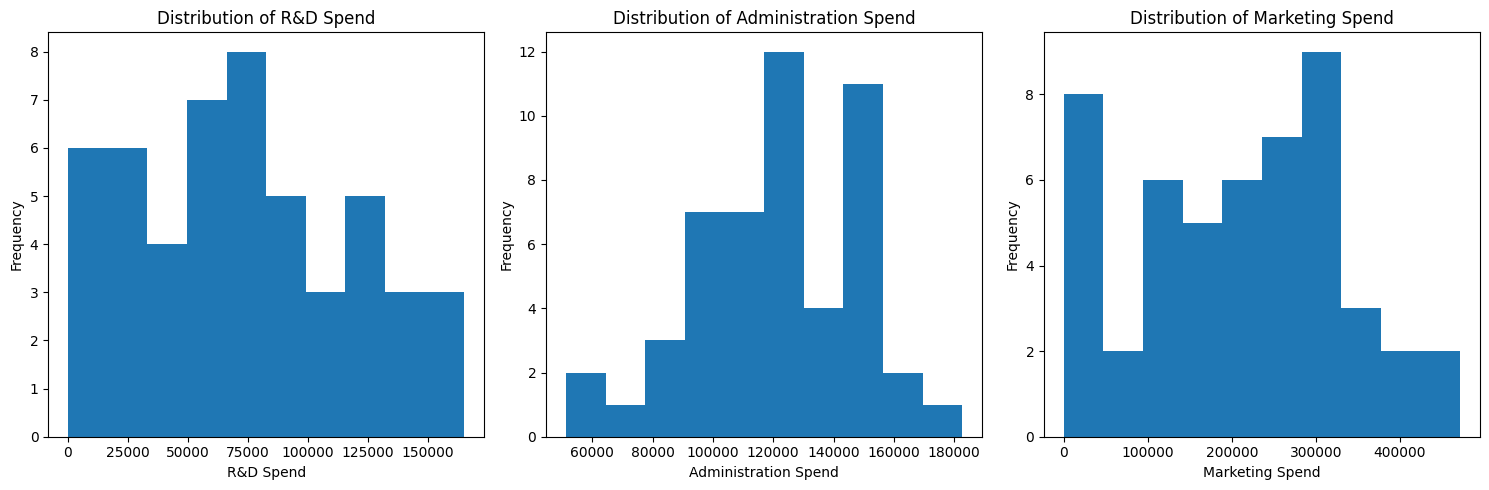

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['R&D Spend'], bins=10)
plt.title('Distribution of R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Administration'], bins=10)
plt.title('Distribution of Administration Spend')
plt.xlabel('Administration Spend')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Marketing Spend'], bins=10)
plt.title('Distribution of Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

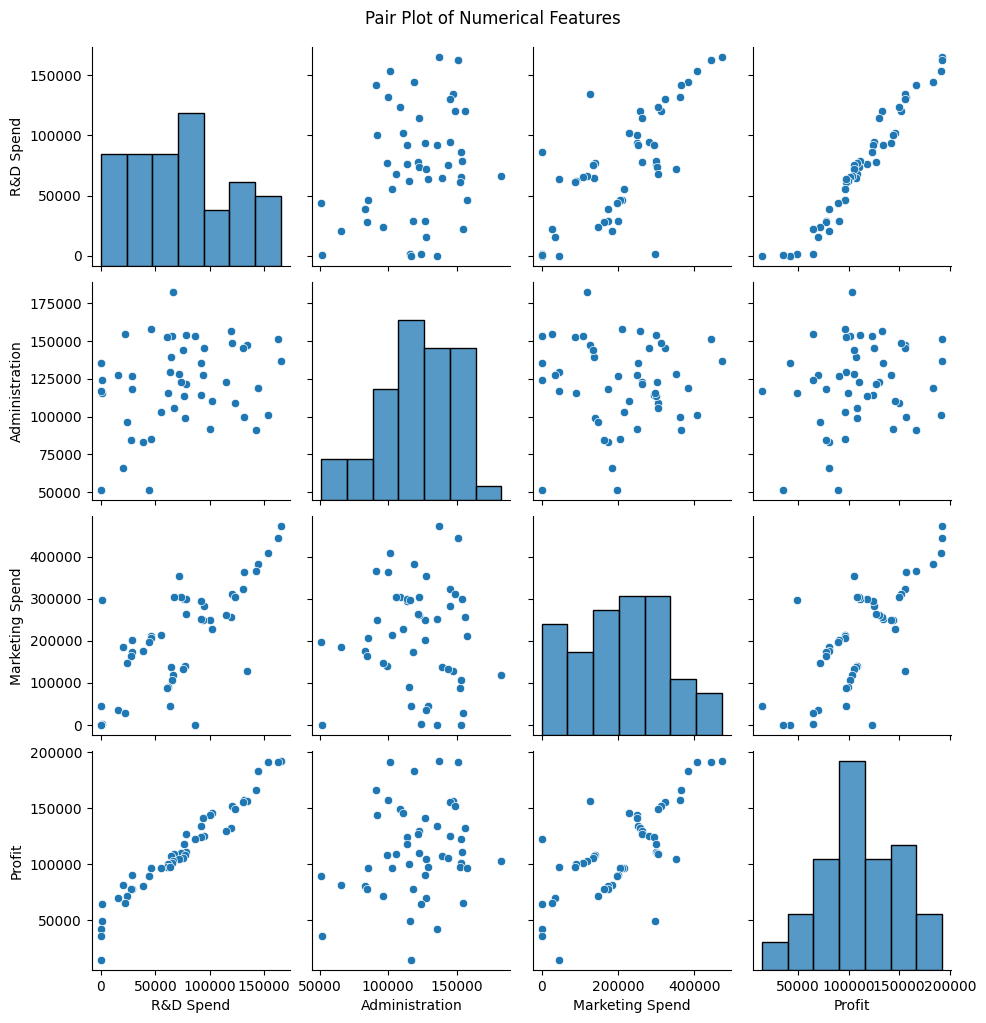

In [11]:
sns.pairplot(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

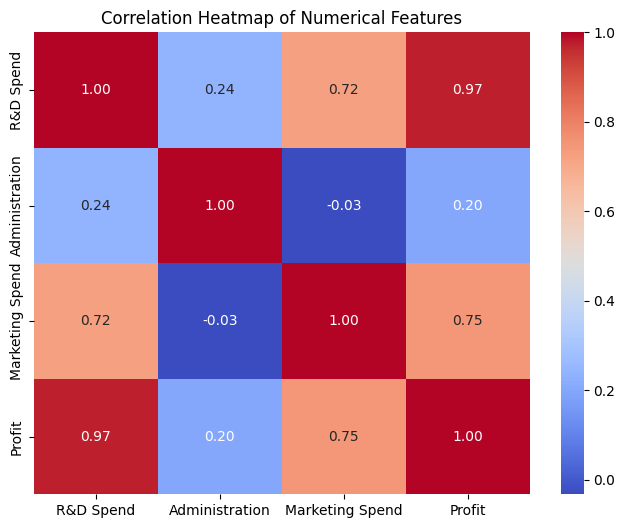

In [12]:
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

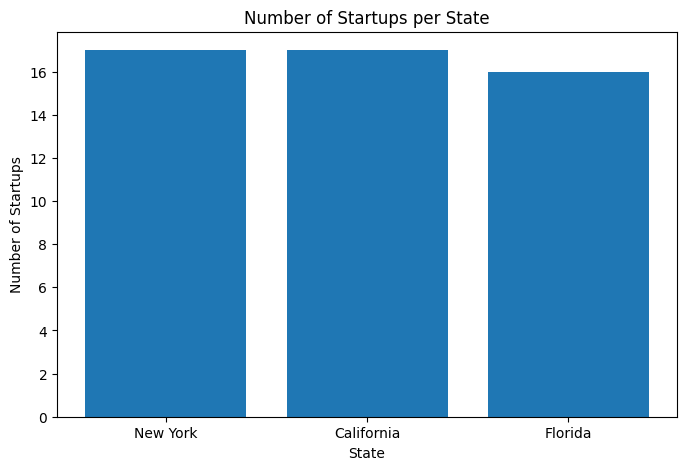

In [13]:
state_counts = df['State'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(state_counts.index, state_counts.values)
plt.title('Number of Startups per State')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.show()

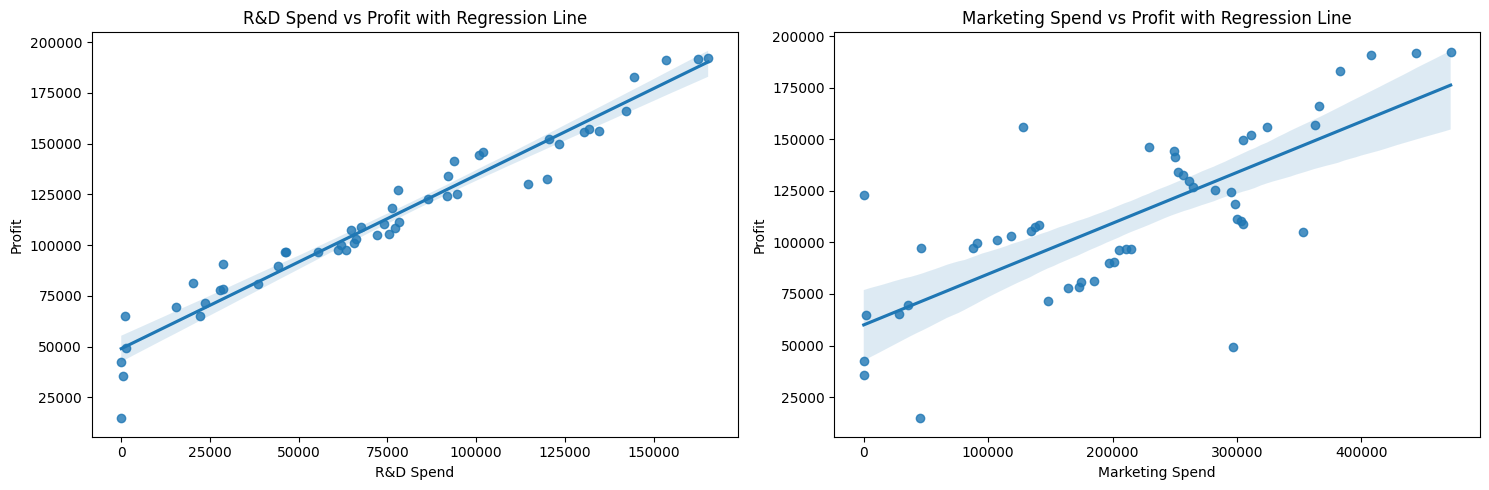

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='R&D Spend', y='Profit', data=df)
plt.title('R&D Spend vs Profit with Regression Line')

plt.subplot(1, 2, 2)
sns.regplot(x='Marketing Spend', y='Profit', data=df)
plt.title('Marketing Spend vs Profit with Regression Line')

plt.tight_layout()
plt.show()

In [15]:
X = df.iloc[:, :-1]   # independent data
y = df.iloc[:, -1]    # dependent data

In [16]:
states = pd.get_dummies(X['State'], drop_first=True) # Converting State column into one-hot-encoding

In [17]:
X = X.drop('State', axis=1) # droping state column

In [18]:
X = pd.concat([X, states], axis=1)

In [19]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
print(y_pred[:5])
print(y_test[:])

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


In [25]:
from sklearn.metrics import r2_score

In [26]:
result = r2_score(y_test, y_pred)

In [27]:
print(result)

0.9347068473282423


In [28]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)